## Проект. Основы машинного обучения. Стратегия взаимодействия с пользователями фитнес-центров.

Сеть бизнес-центров "Культурист-датасаентист" разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных.

Распространенная проблема фитнес-клубов - отток клиентов.

Задача проекта - провести анализ данных и подготовить план действий по удержанию.

### Оглавление

[Шаг 1. Загрузите данные](#first)

[Шаг 2. Проведите исследовательский анализ данных (EDA)](#second)

[Шаг 3. Постройте модель прогнозирования оттока пользователей](#third)

[Шаг 4. Сделайте кластеризацию пользователей](#fourth)

[Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами](#fifth)

<a id='first'>
Шаг 1. Загрузите данные
</a>

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.express as px
from plotly import graph_objects as go
import scipy.stats as stats
import warnings
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import itertools
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

Набор данных включает следующие поля:

•	'Churn' — факт оттока в текущем месяце;

•	Текущие поля в датасете: 

o	Данные пользователя за предыдущий до проверки факта оттока месяц: 

 -'gender' — пол

 -'Near_Location' — проживание или работа в районе, где находится фитнес-центр

 -'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)

 -'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)

 -'Phone' — наличие контактного телефона

 -'Age' — возраст

 -'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)

•	Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента 

o	'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)

o	'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)

o	'Group_visits' — факт посещения групповых занятий

o	'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента

o	'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц

o	'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон


Загружаем датасет.

In [3]:
data = pd.read_csv('.csv', sep=',')

In [4]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<a id='second'>
Шаг 2. Проведите исследовательский анализ данных (EDA)
</a>

### •	Посмотрите на датасет: есть ли в нём отсутствующие значения (пропуски), изучите средние значения и стандартные отклонения (пригодится метод describe());

In [5]:
data.shape

(4000, 14)

Выведим первые 5 строк датасета

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Выводим названия столбцов датасета

In [7]:
data.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

Приведем названия столбцов к единому стилю - уберем заглавные буквы.

In [8]:
data.columns=data.columns.str.lower()

In [9]:
data.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Проверим на наличие дубликатов.

In [10]:
data.duplicated().sum()

0

Выведем средние значения и стандартные отклонения методом describe().

In [11]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


##### В датафрейме пропусков нет, дубликатов нет, названия столбцов приведены к нижнему регистру.

##### Мужчин и женщин в фитнес-центре "Культурист-датасаентист" примерно одинаковое количество.

##### Вблизи от фитнес-центра проживает около 85% клиентов.

#### 49% сотрудников компании-партнера клуба получают скидки на абонемент.

#### 31% клиентов фитнес-клуба приводят своих друзей.

#### 90% клиентов оставляют свой номер телефона.

#### Основной возраст клиентов фитнес-центра: самому старшему 41 год, самому молодому 18 лет, средний возраст - 29 лет.

#### В среднем абонемент по покупают на 3 и 6 месяцев.

#### Более 41% клиентов посещают группрвые занятия.

#### Средняя выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон - составляет 146 у.е., медианное значение - 136 у.е.

#### Срок до окончания текущего действующего абонемента (в месяцах) составляет 4,3 месяца.

#### Средняя частота  посещений в неделю за все время, а также средняя частота посещений в неделю за предыдущий месяц- примерно 2 раза в неделю.

### •	Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());

In [12]:
churn_group=data.groupby('churn')
churn_group_new=churn_group.mean()

In [13]:
churn_group_new

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


#### Среди тех, кто остался, больше всего тех клиентов, которые:

#### живут рядом с бизнес-центром;

#### является сотрудником компании-партнера;

#### имеет длительный абонемент (6 месяцев);

#### посещает групповые занятия;

#### постарше;

#### чаще пользуются услугами фитнес-центра;

#### имеют абонемент, до окончания которого более 5 месяцев;

#### занимаются в фитнес-центре уже 5 месяцев;

#### посещает бизнес-центр 2 раза в неделю и более.

### •	Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

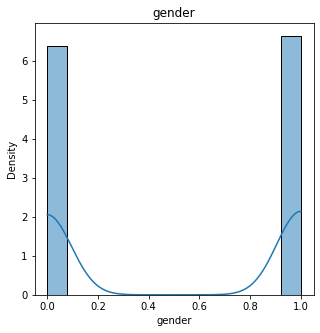

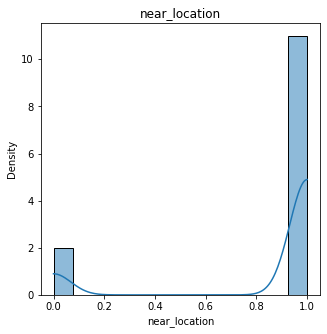

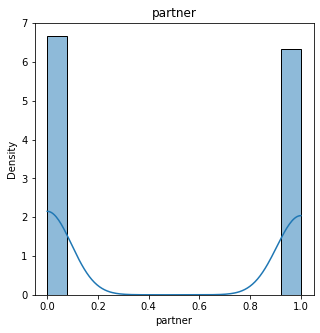

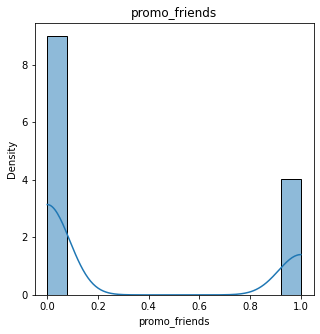

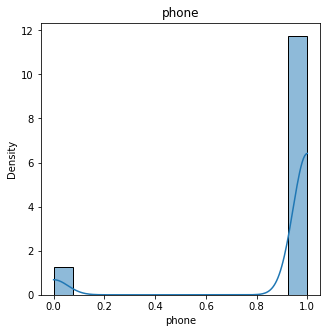

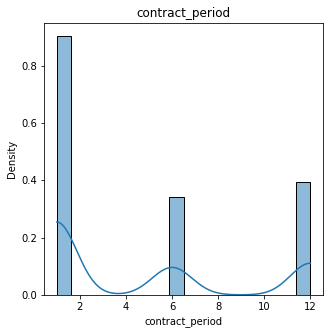

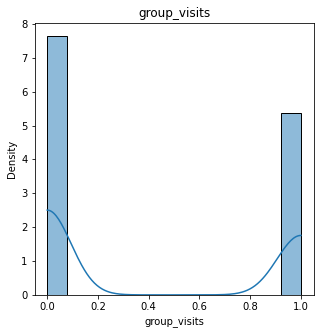

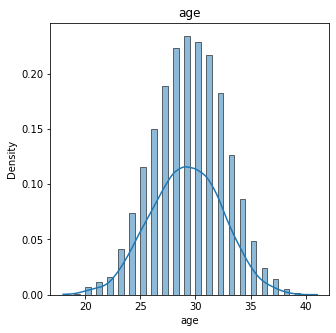

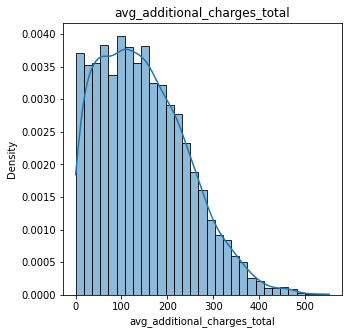

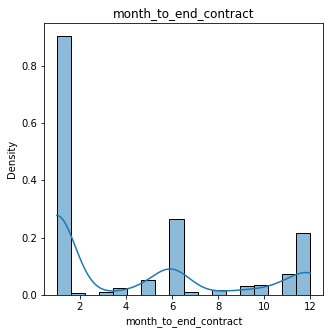

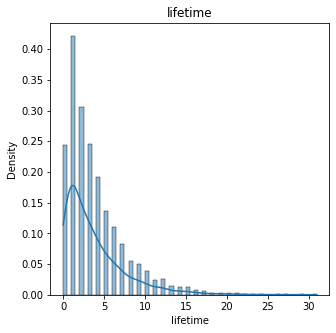

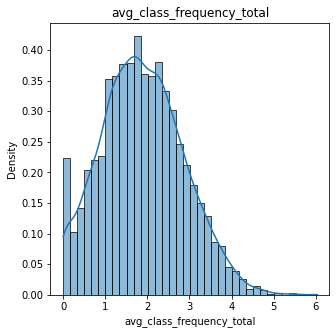

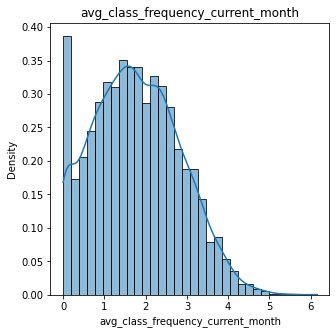

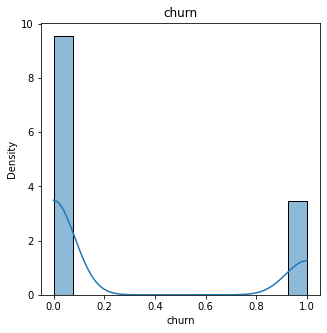

In [14]:
for column in data.columns:
    plt.figure(figsize=(5,5))
    data.groupby('churn')[column]
    sns.histplot(data[column], stat='density',kde=True)
    plt.title(column)
    plt.show()

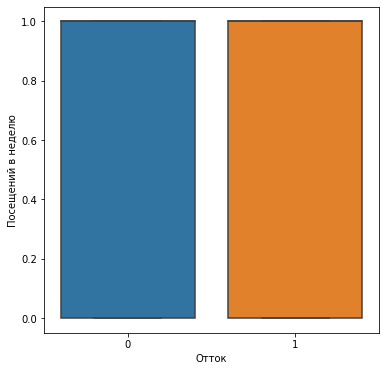

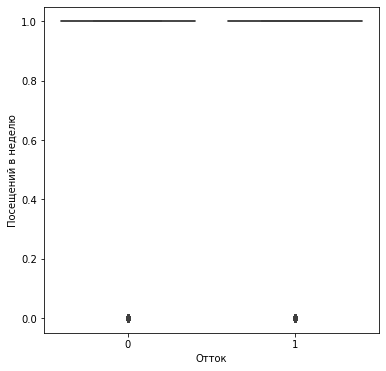

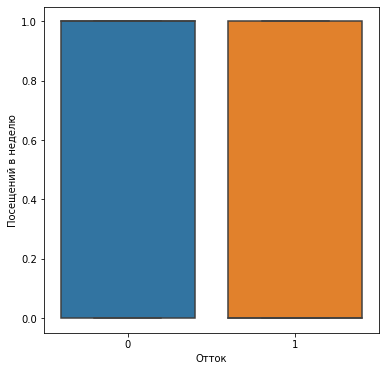

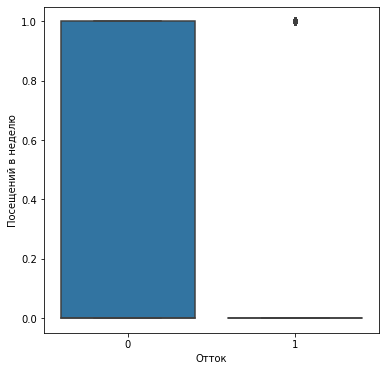

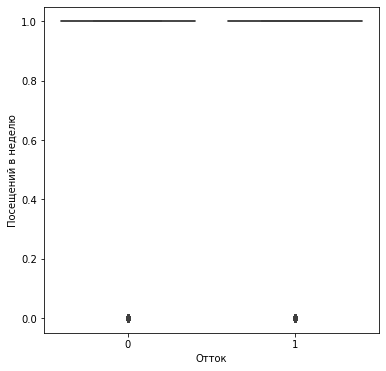

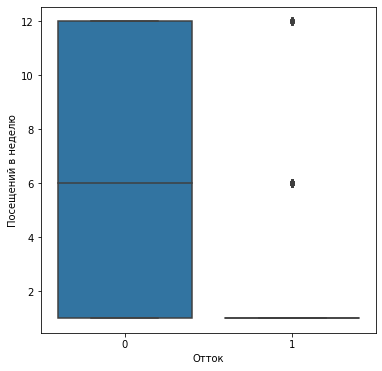

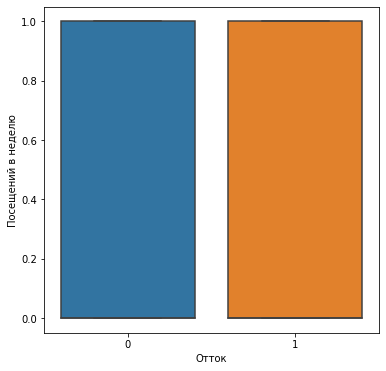

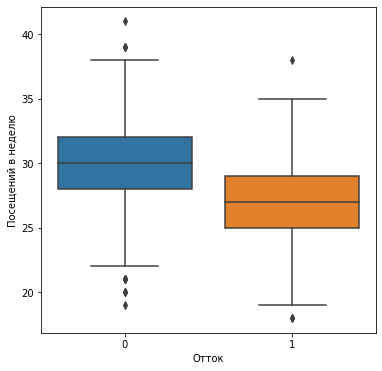

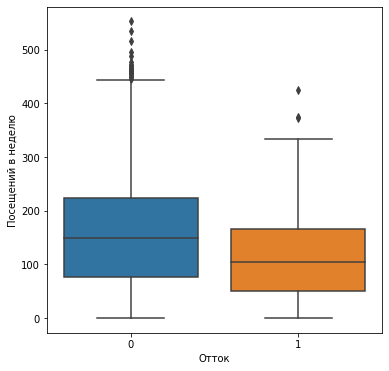

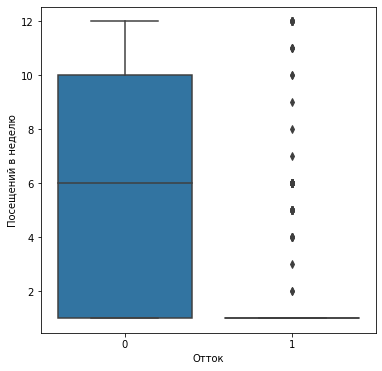

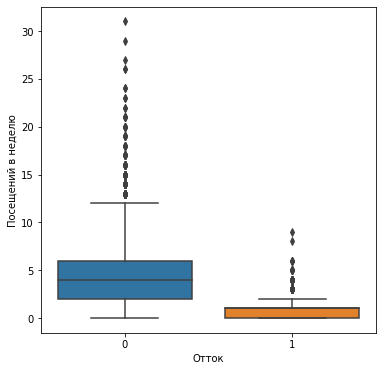

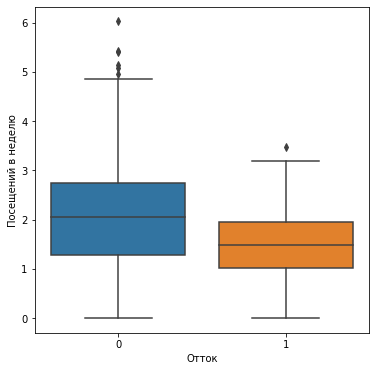

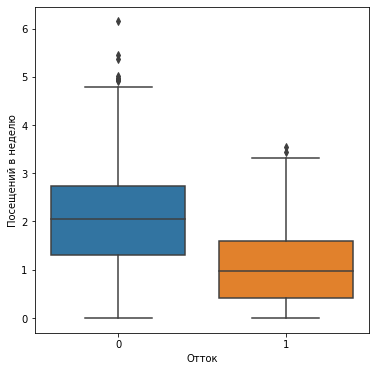

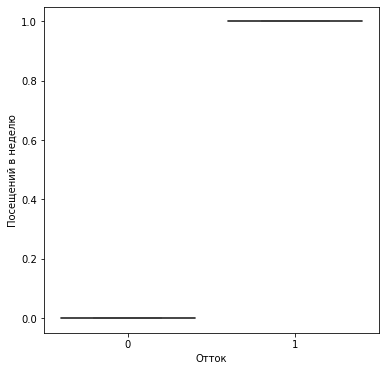

In [15]:
for column in data.columns:
    plt.figure(figsize=(6,6))
    sns.boxplot(x=data['churn'], y=data[column])
    plt.xlabel('Отток')
    plt.ylabel('Посещений в неделю')
    plt.show()

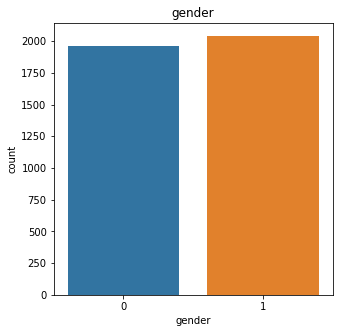

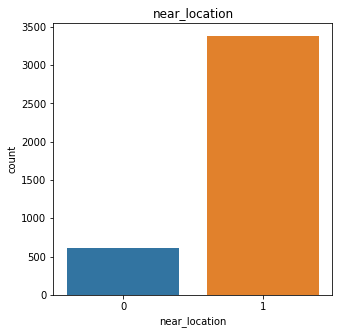

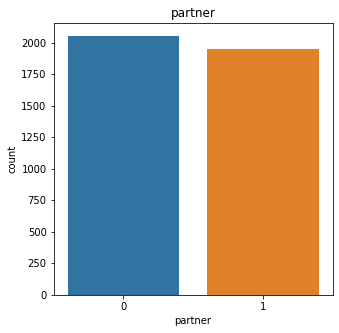

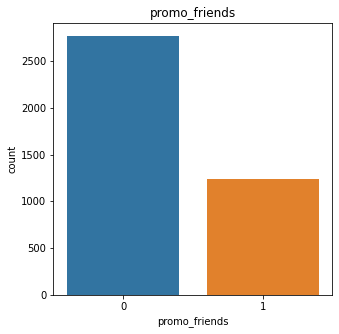

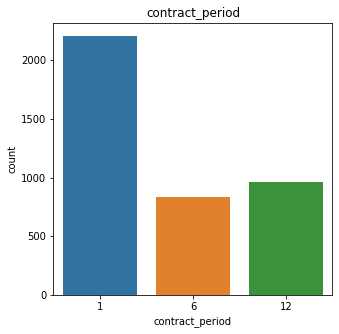

In [16]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(5,5))
    sns.countplot(x=data[column])
    plt.title(column)
    plt.show()

### •	Постройте матрицу корреляций и отобразите её.

In [17]:
cm = data.corr()

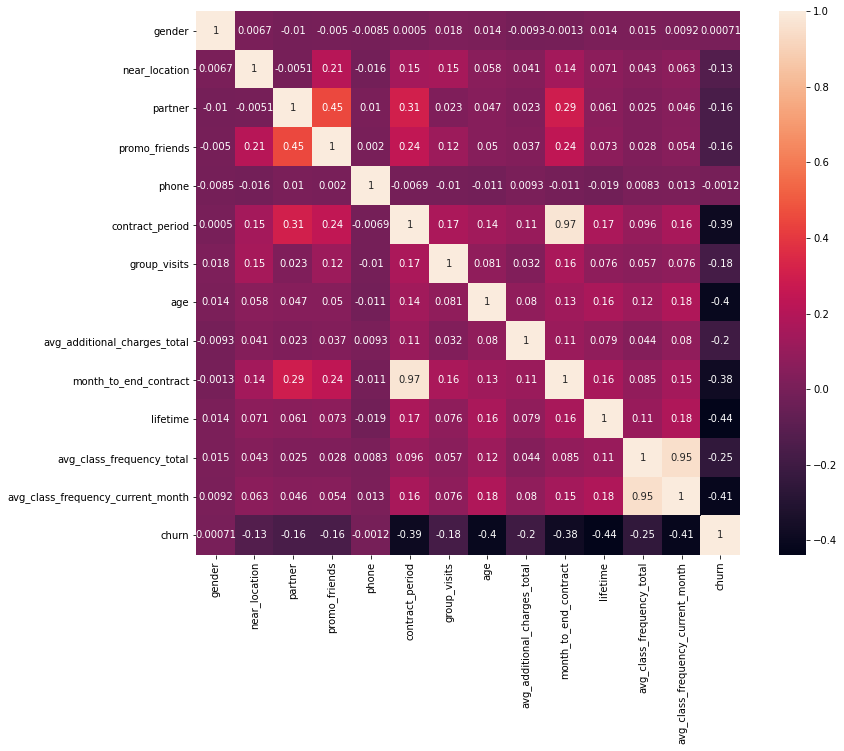

In [18]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(cm, annot = True, square = True, ax=ax)
plt.show()

### Вывод:

#### Чем выше показатель "приведи друга", количество партнеров, близость к дому, наличие друзей, тем больше длительность действующего абонемента.

#### Уровень оттока снижается, когда клиент фитнес-центра:

##### имеет больше друзей;
##### живет близко от фитнес-центра;
##### является постоянным клиентом (высокий лайфтайм);
##### посещает занятия часто и много тратит на дополнительные услуги;
##### посещает групповые занятия.

#### Признаки month_to_end_contact, contact_period, avg_class_frequency_current_month и avg_class_frequency_total сильно коррелируют, так как являются близкими показателями.

<a id='third'>
Шаг 3. Постройте модель прогнозирования оттока пользователей
</a>

In [19]:
'Размер датасета:', data.shape


('Размер датасета:', (4000, 14))

In [20]:
'Соотношение классов:\n', data['churn'].value_counts()


('Соотношение классов:\n',
 0    2939
 1    1061
 Name: churn, dtype: int64)

Разделим данные на признаки (матрица X) и целевую переменную (y)

In [21]:
X = data.drop(['churn'],axis=1) 
y = data['churn']

Разделяем модель на обучающую и валидационную выборку

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [23]:
# обучите StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

In [24]:
# Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [25]:
model = LogisticRegression(solver='liblinear', random_state = 0)
model.fit(X_train_st, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [26]:
predictions = model.predict(X_test_st)
probabilities = model.predict_proba(X_test_st)[:,1]

In [27]:
print('Метрики для логистической регрессии')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Метрики для логистической регрессии
Accuracy: 0.92
Precision: 0.85
Recall: 0.83
F1: 0.84


In [28]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [29]:
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
tree_predictions = tree_model.predict(X_test)
tree_probabilities = tree_model.predict_proba(X_test)[:,1]


In [31]:
# выведем все изученные метрики
print('Метрики для дерева принятия решения')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_probabilities)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_probabilities)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_probabilities)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_probabilities)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, tree_probabilities)))

Метрики для дерева принятия решения
Accuracy: 0.90
Precision: 0.79
Recall: 0.80
F1: 0.80
ROC_AUC: 0.87


#### Регрессия выглядит лучше.

<a id='fourth'>
Шаг 4. Сделайте кластеризацию пользователей
</a>

In [32]:
data_sc_ = data.drop(['churn'], axis = 1)
data_columns_list = data_sc_.columns

data_sc_ = StandardScaler()
X_sc = data_sc_.fit_transform(X)
linled =  linkage(X_sc, method='ward')

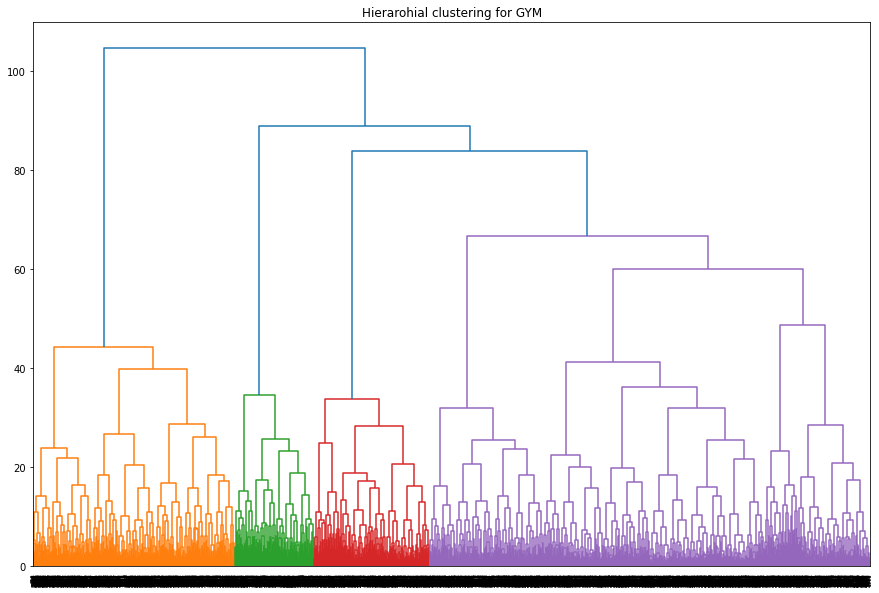

In [33]:
plt.figure(figsize=(15,10))
dendrogram(linled, orientation='top')
plt.title('Hierarohial clustering for GYM')
plt.show()

Проводим кластеризацию методом KMeans. Создаем модель KMeans с числом кластеров 5.

In [34]:
km = KMeans(n_clusters = 5, random_state =0)

Прогнозируем кластеры для наблюдений

In [35]:
labels = km.fit_predict(X_sc)
data['cluster'] = labels

In [36]:
data.cluster.value_counts()

3    1262
0    1010
4     838
2     505
1     385
Name: cluster, dtype: int64

In [37]:
data.groupby(['cluster']).mean().sort_values(by='cluster')


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


### Выводы:

#### Кластеры со склонностью к оттоку ( у нас это 3 и 4 кластеры):

##### Клиентов не так много, они примерно в середине срока действия абонемента. Для удержания, возможно, нужен индивидуальный подход, например, индивидуальные тренировки с фитнес-тренером;
##### Пришли без друзей, редко посещают заняти, в том числе групповые, возраст 28 лет.

#### Надежные кластеры (у нас это 1,2 и 5).

#### Самый надежный 1 кластер. В него вошли:

##### Жители района, сотрудники компаний-партнеров, занимающиеся с друзьми, регулярно посещают занятия.

#### Кластеры 1 и 5 имеют самый низкий показатель оттока, хотя возможно, имеют склонность к повышению:

##### Таких клиентов нужно поощрять за более частые посещения, предлагать скидки при приближении срока окончания абонемента.

### Построим графики распределения всех признаков по кластерам.

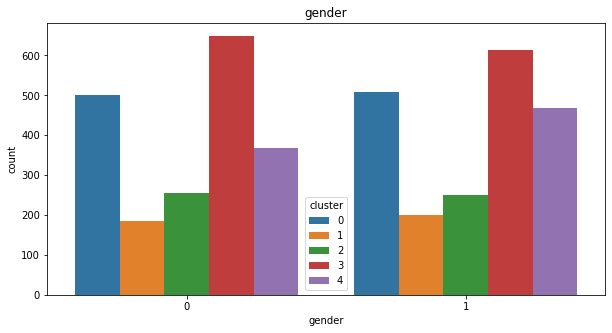

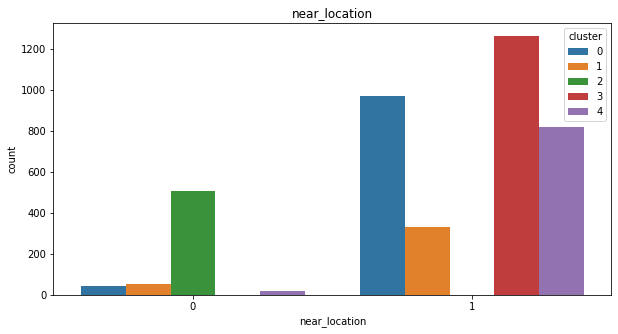

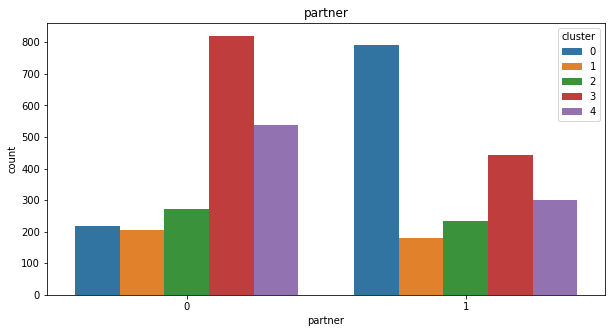

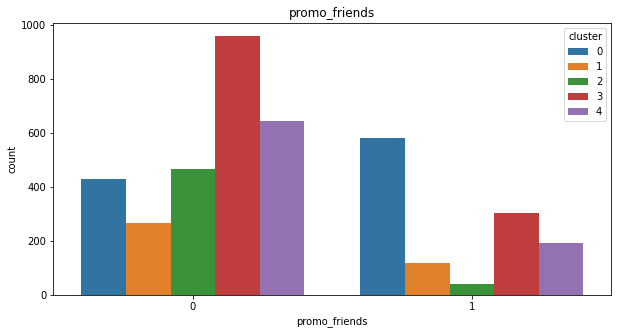

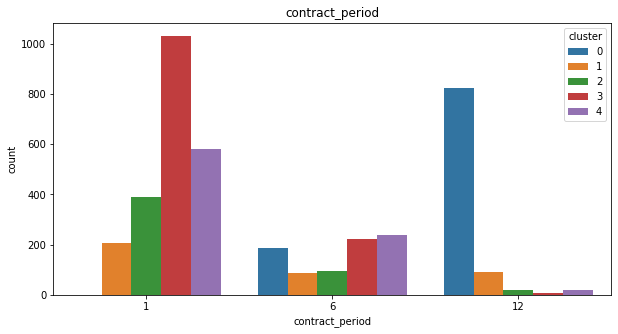

In [38]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(10,5))
    sns.countplot(x=data[column],hue='cluster', data=data)
    plt.title(column)
    plt.show()

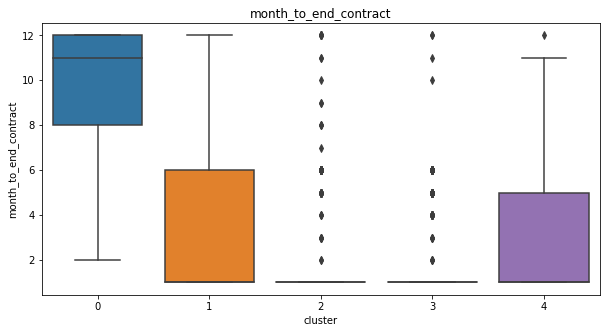

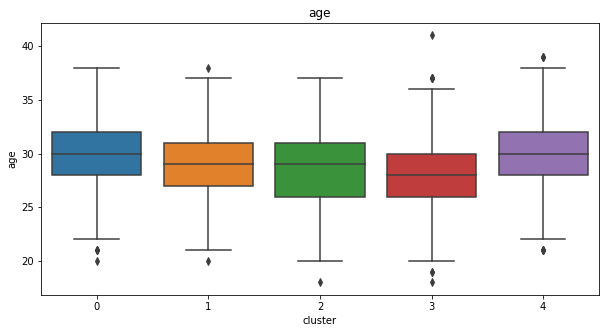

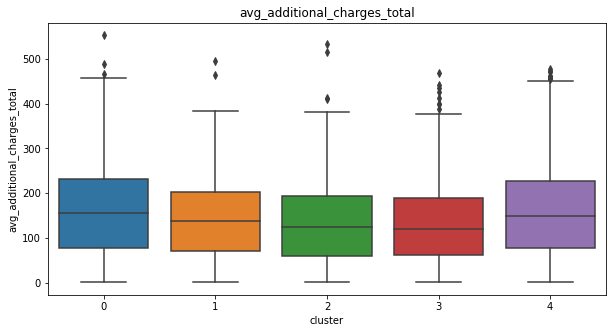

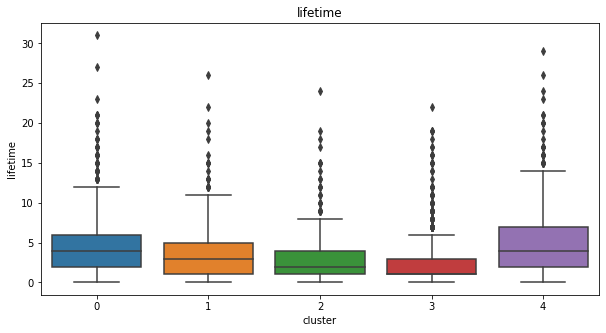

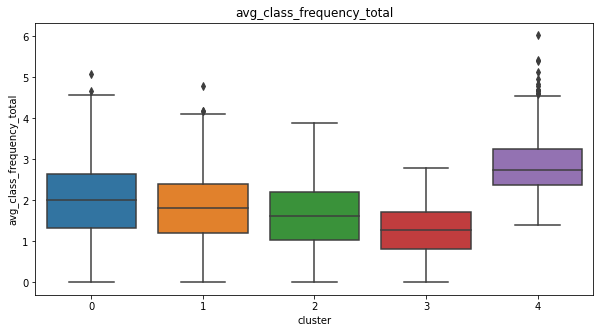

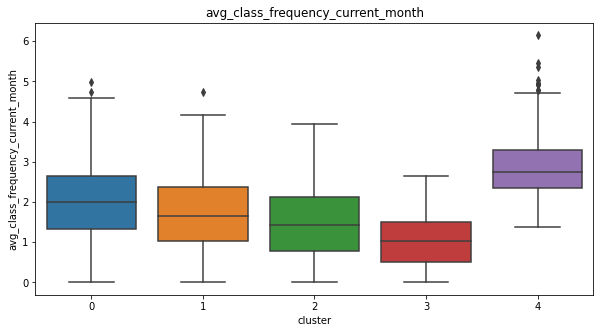

In [39]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='cluster', y=data[column], data=data)
    plt.title(column)
    plt.show()

<a id='fifth'>
Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами
</a>

#### Необходимо поддерживать и мотивировать "хорошие" кластеры.

#### Необходимо расширять программы привлечения сотрудников компаний-партнеров и список самих партнеров.

#### Необходимо глубже сегментировать оттекающих, разработать индивидуальные предложения и тестировать их применительно к каждому сегменту.

#### Необходимо поддерживать и мотивировать привлечение новых клиентов по акции "приведи друга".

#### Необходимо повышать привлекательность посещения групповых занятий, возможно, ввести игровую составляющую при проведении, провести опрос на предмет, какие групповые занятия предпочитают клиенты, какие направления хотели бы добавить, какое время проведения групповых занятий наболее предпостительно для посещения.

#### Необходимо выстроить модель работы с клиентами, чтобы превинтивно работать с клиентами, до оттока, а не после.

#### Необходима активная реклама фитнес-центра, его услуг и преимуществ, особенно в районе местонахождения, чтобы максимально привлечь проживающих поблизости.